In [1]:
import keras as k
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [2]:
model = Sequential()#[Dense(4,activation='sigmoid',use_bias=True, input_dim=2)])

In [3]:
model.add(Dense(4,activation='sigmoid',use_bias=True, input_dim=2))

In [4]:
model.add(Dense(2,activation='sigmoid'))

In [5]:
model.add(Dense(1,activation='sigmoid'))

In [6]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
import pandas as pd
import numpy as np
data=pd.read_csv("pseudo_data_square.csv",sep="\t", header=None)
data.columns=['x','y','results']
DATA_1=np.array(data.x)
DATA_2=np.array(data.y)
RESULTS=np.array(data.results)
END=int(len(DATA_1)*0.6)
DATA_train=np.vstack((DATA_1[:END], DATA_2[:END])).T
RESULTS_train=RESULTS[:END]
DATA_check=np.vstack((DATA_1[END:], DATA_2[END:])).T
RESULTS_check=RESULTS[END:]
RESULTS_NN=np.zeros(len(RESULTS[END:]))
print(DATA_train)

[[0.1005 0.6301]
 [0.7923 0.3133]
 [0.4822 0.1413]
 [0.6675 0.7337]
 [0.567  0.1815]
 [0.6902 0.5589]
 [0.6933 0.3023]
 [0.6367 0.5379]
 [0.2166 0.0598]
 [0.8646 0.0285]
 [0.2704 0.5792]
 [0.126  0.27  ]
 [0.8512 0.9959]
 [0.5249 0.3403]
 [0.5772 0.8285]
 [0.796  0.5481]
 [0.7529 0.923 ]
 [0.9311 0.0446]
 [0.5618 0.9416]
 [0.8074 0.5886]
 [0.3021 0.2672]
 [0.127  0.4831]
 [0.4126 0.9581]
 [0.7735 0.9536]
 [0.2044 0.8177]
 [0.5921 0.7617]
 [0.7809 0.992 ]
 [0.742  0.811 ]
 [0.8771 0.3788]
 [0.0016 0.7346]
 [0.6793 0.8019]
 [0.2675 0.6202]
 [0.2108 0.8034]
 [0.224  0.8364]
 [0.5171 0.3005]
 [0.7164 0.3687]
 [0.8592 0.2724]
 [0.5874 0.822 ]
 [0.2655 0.6325]
 [0.226  0.2674]
 [0.9473 0.1612]
 [0.5276 0.7582]
 [0.4079 0.6442]
 [0.9938 0.1481]
 [0.3102 0.977 ]
 [0.1676 0.9812]
 [0.2807 0.4523]
 [0.8946 0.1523]
 [0.6016 0.2717]
 [0.3443 0.0373]
 [0.1762 0.3322]
 [0.0345 0.3046]
 [0.9614 0.3877]
 [0.0112 0.2869]
 [0.7055 0.7463]
 [0.6528 0.0073]
 [0.8814 0.7733]
 [0.098  0.5002]
 [0.3916 0.884

In [9]:
model.fit(DATA_train,RESULTS_train, epochs=300, batch_size=10)

Epoch 1/300
300/300 [==============================] - 0s 1ms/step - loss: 0.7460 - accuracy: 0.5167
Epoch 2/300
300/300 [==============================] - 0s 424us/step - loss: 0.7368 - accuracy: 0.5167
Epoch 3/300
300/300 [==============================] - 0s 313us/step - loss: 0.7290 - accuracy: 0.5167
Epoch 4/300
300/300 [==============================] - 0s 272us/step - loss: 0.7227 - accuracy: 0.5167
Epoch 5/300
300/300 [==============================] - 0s 288us/step - loss: 0.7170 - accuracy: 0.5167
Epoch 6/300
300/300 [==============================] - 0s 278us/step - loss: 0.7118 - accuracy: 0.5167
Epoch 7/300
300/300 [==============================] - 0s 283us/step - loss: 0.7076 - accuracy: 0.5167
Epoch 8/300
300/300 [==============================] - 0s 295us/step - loss: 0.7043 - accuracy: 0.5167
Epoch 9/300
300/300 [==============================] - 0s 254us/step - loss: 0.7016 - accuracy: 0.5167
Epoch 10/300
300/300 [==============================] - 0s 299us/step - los

300/300 [==============================] - 0s 442us/step - loss: 0.6054 - accuracy: 0.8133
Epoch 80/300
300/300 [==============================] - 0s 346us/step - loss: 0.6024 - accuracy: 0.8167
Epoch 81/300
300/300 [==============================] - 0s 303us/step - loss: 0.5993 - accuracy: 0.8100
Epoch 82/300
300/300 [==============================] - 0s 348us/step - loss: 0.5961 - accuracy: 0.8333
Epoch 83/300
300/300 [==============================] - 0s 364us/step - loss: 0.5929 - accuracy: 0.8467
Epoch 84/300
300/300 [==============================] - 0s 488us/step - loss: 0.5898 - accuracy: 0.8533
Epoch 85/300
300/300 [==============================] - 0s 452us/step - loss: 0.5867 - accuracy: 0.8633
Epoch 86/300
300/300 [==============================] - 0s 443us/step - loss: 0.5835 - accuracy: 0.86330s - loss: 0.5842 - accuracy: 0.
Epoch 87/300
300/300 [==============================] - 0s 330us/step - loss: 0.5801 - accuracy: 0.8767
Epoch 88/300
300/300 [=======================

300/300 [==============================] - 0s 278us/step - loss: 0.2629 - accuracy: 0.9767
Epoch 158/300
300/300 [==============================] - 0s 276us/step - loss: 0.2594 - accuracy: 0.9767
Epoch 159/300
300/300 [==============================] - 0s 275us/step - loss: 0.2559 - accuracy: 0.9767
Epoch 160/300
300/300 [==============================] - 0s 267us/step - loss: 0.2522 - accuracy: 0.9767
Epoch 161/300
300/300 [==============================] - 0s 227us/step - loss: 0.2485 - accuracy: 0.9767
Epoch 162/300
300/300 [==============================] - 0s 307us/step - loss: 0.2453 - accuracy: 0.9767
Epoch 163/300
300/300 [==============================] - 0s 257us/step - loss: 0.2420 - accuracy: 0.9767
Epoch 164/300
300/300 [==============================] - 0s 264us/step - loss: 0.2385 - accuracy: 0.9767
Epoch 165/300
300/300 [==============================] - 0s 306us/step - loss: 0.2351 - accuracy: 0.9767
Epoch 166/300
300/300 [==============================] - 0s 280us/ste

300/300 [==============================] - 0s 241us/step - loss: 0.1002 - accuracy: 0.9967
Epoch 236/300
300/300 [==============================] - 0s 229us/step - loss: 0.0992 - accuracy: 0.9967
Epoch 237/300
300/300 [==============================] - 0s 245us/step - loss: 0.0981 - accuracy: 0.9967
Epoch 238/300
300/300 [==============================] - 0s 266us/step - loss: 0.0972 - accuracy: 0.9967
Epoch 239/300
300/300 [==============================] - 0s 250us/step - loss: 0.0963 - accuracy: 0.9967
Epoch 240/300
300/300 [==============================] - 0s 250us/step - loss: 0.0955 - accuracy: 0.9967
Epoch 241/300
300/300 [==============================] - 0s 255us/step - loss: 0.0948 - accuracy: 0.9967
Epoch 242/300
300/300 [==============================] - 0s 274us/step - loss: 0.0939 - accuracy: 0.9967
Epoch 243/300
300/300 [==============================] - 0s 249us/step - loss: 0.0932 - accuracy: 0.9967
Epoch 244/300
300/300 [==============================] - 0s 282us/ste

In [10]:
RESULTS_NN=model.predict(DATA_check, batch_size=None, verbose=0, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False)
RESULTS_NN_trans=RESULTS_NN.transpose()
RESULTS_NN=RESULTS_NN_trans[0,:]
print(RESULTS_NN)

[0.17908481 0.9848979  0.8340705  0.00882235 0.9928011  0.894157
 0.54547894 0.01390928 0.18345104 0.989031   0.98866165 0.02953227
 0.9774046  0.9895008  0.01475353 0.21544056 0.01326874 0.9341195
 0.5683658  0.0260898  0.98465824 0.9936521  0.12427989 0.02582488
 0.9913492  0.00992034 0.00781887 0.00814111 0.8650657  0.96807253
 0.47578764 0.03869097 0.9917721  0.6669189  0.12287705 0.00945864
 0.9923923  0.5551189  0.00864903 0.9926838  0.00746006 0.9899582
 0.01106549 0.00986762 0.01086615 0.00999545 0.01016877 0.99293077
 0.23169218 0.03458417 0.9927658  0.01543764 0.98976105 0.00783601
 0.9498737  0.99241966 0.98310226 0.99137807 0.9887416  0.9723111
 0.96979964 0.01319158 0.00753653 0.01275171 0.04100742 0.9884317
 0.2580366  0.01006968 0.9885295  0.9730324  0.78848237 0.06600957
 0.20309614 0.9350882  0.00753714 0.00784475 0.00992131 0.9921948
 0.02849489 0.9933062  0.9683488  0.33741552 0.00829082 0.9621941
 0.06065838 0.00916521 0.99364567 0.00817021 0.993048   0.03562377
 0.

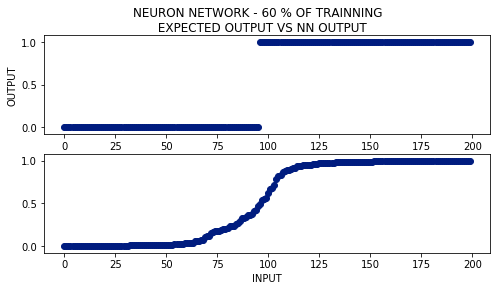

In [14]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,figsize=(8,4))
plt.suptitle('NEURON NETWORK - 60 % OF TRAINNING \n EXPECTED OUTPUT VS NN OUTPUT')

x1=np.arange(len(RESULTS_NN))

axs[1].scatter(x1,sorted(RESULTS_NN), marker='o',label="CORRECT OUTUPTS")
axs[0].scatter(x1,sorted(RESULTS_check),label="NN OUTUPTS")
axs[1].set_xlabel('INPUT')
axs[0].set_ylabel('OUTPUT')
#plt.tight_layout()
plt.show()

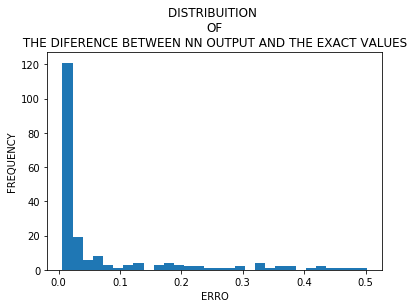

In [12]:
ERRO=np.fabs(RESULTS_check-RESULTS_NN)
plt.hist(ERRO,bins=30)
plt.title("DISTRIBUITION \nOF\n THE DIFERENCE BETWEEN NN OUTPUT AND THE EXACT VALUES ")
plt.ylabel('FREQUENCY')
plt.xlabel('ERRO')
plt.show()

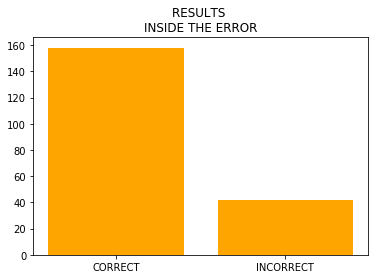

In [13]:
X2=np.array([(ERRO<0.1).sum(),(ERRO>0.1).sum()])
Label=['CORRECT','INCORRECT']
plt.bar(np.arange(len(X2)),X2,color='orange')
plt.title('RESULTS \nINSIDE THE ERROR')
plt.xticks(np.arange(len(Label)),labels=Label)
plt.style.use('seaborn-dark-palette')
plt.show()